In [1]:
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.getenv("PINECONE_API_KEY")

# 인덱스 생성

In [2]:
pip install pinecone

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pinecone import Pinecone
# 클라이언트 생성
pinecone_client = Pinecone(api_key= api_key)

In [4]:
from pinecone import ServerlessSpec
pinecone_client.create_index(
  name='embedding-3d',
  dimension=3,
  metric='cosine',
  spec=ServerlessSpec(
    cloud='aws',
    region='us-east-1'
  )
)

PineconeApiException: (409)
Reason: Conflict
HTTP response headers: HTTPHeaderDict({'content-type': 'text/plain; charset=utf-8', 'access-control-allow-origin': '*', 'vary': 'origin,access-control-request-method,access-control-request-headers', 'access-control-expose-headers': '*', 'x-pinecone-api-version': '2025-04', 'x-cloud-trace-context': 'e09de776d83d10b1a66553af52bfeeb9', 'date': 'Tue, 09 Sep 2025 01:15:01 GMT', 'server': 'Google Frontend', 'Content-Length': '85', 'Via': '1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'})
HTTP response body: {"error":{"code":"ALREADY_EXISTS","message":"Resource  already exists"},"status":409}


In [3]:
index = pinecone_client.Index('embedding-3d')
index

c:\Users\Admin\miniconda3\envs\prompting_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

index.describe_index_stats()

{'dimension': 3,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'embedding-3d-ns1': {'vector_count': 6}},
 'total_vector_count': 6,
 'vector_type': 'dense'}

In [5]:
for ids in index.list(namespace='embedding-3d-ns1'):
  print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


# pinecone data 형식
[{ 'id' : 'vec1' , 'values' :[1.0, 1.5, 2.0] , 'metadata' : {'genre':'drama'}}, { 'id' : 'vec2' , 'values' :[2.0, 1.5, 0.5] , 'metadata' : {'genre':'action'}}, { 'id' : 'vec3' , 'values' :[0.1, 0.3, 0.5] , 'metadata' : {'genre':'drama'}}, { 'id' : 'vec4' , 'values' :[1.0, 2.5, 3.5] , 'metadata' : {'genre':'action'}}, { 'id' : 'vec5' , 'values' :[3.0, 1.2, 1.3] , 'metadata' : {'genre':'action'}}, { 'id' : 'vec6' , 'values' :[0.3, 1.1, 2.5] , 'metadata' : {'genre':'drama'}}, ]

In [6]:
index.upsert(
  vectors=[{ 'id' : 'vec1' , 'values' :[1.0, 1.5, 2.0] , 'metadata' : {'genre':'drama'}},
    { 'id' : 'vec2' , 'values' :[2.0, 1.5, 0.5] , 'metadata' : {'genre':'action'}},
    { 'id' : 'vec3' , 'values' :[0.1, 0.3, 0.5] , 'metadata' : {'genre':'drama'}},
    { 'id' : 'vec4' , 'values' :[1.0, 2.5, 3.5] , 'metadata' : {'genre':'action'}},
    { 'id' : 'vec5' , 'values' :[3.0, 1.2, 1.3] , 'metadata' : {'genre':'action'}},
    { 'id' : 'vec6' , 'values' :[0.3, 1.1, 2.5] , 'metadata' : {'genre':'drama'}},
    ],
  namespace='embedding-3d-ns1'
  ) #update + insert

{'upserted_count': 6}

In [7]:
index.describe_index_stats()

{'dimension': 3,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'embedding-3d-ns1': {'vector_count': 6}},
 'total_vector_count': 6,
 'vector_type': 'dense'}

id list

In [8]:
for ids in index.list(namespace='embedding-3d-ns1'):
  print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']



query


In [9]:
response = index.query(
  namespace='embedding-3d-ns1',
  vector=[0.1, 0.4, 0.7], # 질의 벡터
  top_k=3, # 몇 개의 결과
  include_values=True,
  include_metadata=True,
  filter={'genre':{'$eq':'drama'}}
)
response

{'matches': [{'id': 'vec3',
              'metadata': {'genre': 'drama'},
              'score': 1.00008953,
              'values': [0.1, 0.3, 0.5]},
             {'id': 'vec6',
              'metadata': {'genre': 'drama'},
              'score': 0.99550879,
              'values': [0.3, 1.1, 2.5]},
             {'id': 'vec1',
              'metadata': {'genre': 'drama'},
              'score': 0.961182,
              'values': [1.0, 1.5, 2.0]}],
 'namespace': 'embedding-3d-ns1',
 'usage': {'read_units': 1}}

In [11]:
ns = 'embedding-3d-ns1'
for ids in index.list(namespace=ns):
    print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


In [12]:
from itertools import chain
all_ids = list(chain.from_iterable(index.list(namespace = ns)))
resp = index.fetch(ids=all_ids, namespace=ns)
resp

FetchResponse(namespace='embedding-3d-ns1', vectors={'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None), 'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None), 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.5], metadata={'genre': 'action'}, sparse_values=None), 'vec3': Vector(id='vec3', values=[0.1, 0.3, 0.5], metadata={'genre': 'drama'}, sparse_values=None), 'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None), 'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'drama'}, sparse_values=None)}, usage={'read_units': 1})

In [13]:
resp.vectors

{'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None),
 'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None),
 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.5], metadata={'genre': 'action'}, sparse_values=None),
 'vec3': Vector(id='vec3', values=[0.1, 0.3, 0.5], metadata={'genre': 'drama'}, sparse_values=None),
 'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None),
 'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'drama'}, sparse_values=None)}

In [15]:
for vid, v in resp.vectors.items():
    vid, v.values

# page

1개씩 벡터 꺼내기

In [16]:

for id_page in index.list(namespace=ns):
  print('*',id_page)
  resp = index.fetch(ids=id_page, namespace=ns)
  for vid, v in resp.vectors.items():
    print(vid, v.values)

* ['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']
vec5 [3.0, 1.2, 1.3]
vec2 [2.0, 1.5, 0.5]
vec6 [0.3, 1.1, 2.5]
vec4 [1.0, 2.5, 3.5]
vec1 [1.0, 1.5, 2.0]
vec3 [0.1, 0.3, 0.5]


# 새로운 쿼리벡터 추가하기

In [17]:
ids = list(resp.vectors.keys())
values = [vec.values for vec in resp.vectors.values()]

In [18]:
ids.append('qv')
values.append([0.1,0.3,0.7])

# 시각화

In [19]:
!pip install matplotlib

  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------- -------------------- 3.9/8.1 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 22.9 MB/s  0:00:00
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 18.3 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl (73 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]

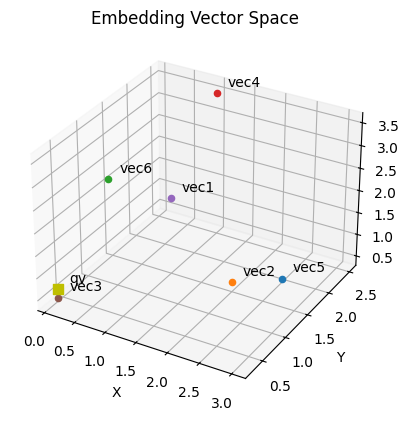

In [20]:
import matplotlib.pyplot as plt

# 3D 플롯을 생성합니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 벡터의 ID와 값을 사용하여 3D 공간에 점을 그립니다.
for i, id in enumerate(ids):
    if id == "qv":
        # 쿼리 벡터는 노란색 사각형으로 표시합니다.
        ax.scatter(values[i][0], values[i][1], values[i][2], label=id, color='y', s=50, marker='s')
        ax.text(values[i][0] + 0.1, values[i][1] + 0.1, values[i][2] + 0.1, id)
    else:
        # 나머지 벡터는 기본 색상으로 표시합니다.
        ax.scatter(values[i][0], values[i][1], values[i][2], label=id)
        ax.text(values[i][0] + 0.1, values[i][1] + 0.1, values[i][2] + 0.1, id)

# 축 레이블과 제목을 설정합니다.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Embedding Vector Space')

# 플롯을 표시합니다.
plt.show()

# 임베딩 미션
name: "quickstart" 서버리스 인덱스 생성 

dim: 1024

In [26]:
from pinecone import ServerlessSpec
pinecone_client.create_index(
  name='quickstart',
  dimension=1024,
  metric='cosine',
  spec=ServerlessSpec(
    cloud='aws',
    region='us-east-1'
  )
)

{
    "name": "quickstart",
    "metric": "cosine",
    "host": "quickstart-qkg5fg2.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 1024,
    "deletion_protection": "disabled",
    "tags": null
}

In [29]:
index = pinecone_client.Index('quickstart')
index.describe_index_stats()

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {},
 'total_vector_count': 0,
 'vector_type': 'dense'}

In [ ]:
data = [
    {"id": "vec1", "text": "사과는 달콤하고 아삭한 식감으로 유명한 인기 있는 과일입니다."},
    {"id": "vec2", "text": "애플이라는 기술 회사는 아이폰과 같은 혁신적인 제품으로 유명합니다."},
    {"id": "vec3", "text": "많은 사람들이 건강한 간식으로 사과를 즐겨 먹습니다."},
    {"id": "vec4", "text": "애플 주식회사는 세련된 디자인과 사용자 친화적인 인터페이스로 기술 산업을 혁신했습니다."},
    {"id": "vec5", "text": "하루에 사과 하나면 의사를 멀리할 수 있다는 속담이 있습니다."},
    {"id": "vec6", "text": "애플 컴퓨터 회사는 1976년 4월 1일 스티브 잡스, 스티브 워즈니악, 로널드 웨인에 의해 파트너십으로 설립되었습니다."}
]

임베딩 모델 multilingual-e5-large 

upsert() 

describe_index_stats() 

query_vector : "애플이라는 기술 회사에 대해 알려주세요." 

index.query()

In [24]:
!pip install hf_xet

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 23.3 MB/s  0:00:00


In [25]:
from sentence_transformers import SentenceTransformer

# 모델 로드
model = SentenceTransformer("intfloat/multilingual-e5-large")

# 데이터
data = [
    {"id": "vec1", "text": "사과는 달콤하고 아삭한 식감으로 유명한 인기 있는 과일입니다."},
    {"id": "vec2", "text": "애플이라는 기술 회사는 아이폰과 같은 혁신적인 제품으로 유명합니다."},
    {"id": "vec3", "text": "많은 사람들이 건강한 간식으로 사과를 즐겨 먹습니다."},
    {"id": "vec4", "text": "애플 주식회사는 세련된 디자인과 사용자 친화적인 인터페이스로 기술 산업을 혁신했습니다."},
    {"id": "vec5", "text": "하루에 사과 하나면 의사를 멀리할 수 있다는 속담이 있습니다."},
    {"id": "vec6", "text": "애플 컴퓨터 회사는 1976년 4월 1일 스티브 잡스, 스티브 워즈니악, 로널드 웨인에 의해 파트너십으로 설립되었습니다."}
]

# passage prefix 붙이기 (권장)
texts = [f"passage: {item['text']}" for item in data]

# 임베딩 추출
vectors = model.encode(texts, normalize_embeddings=True)  # cosine similarity를 위해 정규화

# 결과 확인
for i, item in enumerate(data):
    print(item["id"], vectors[i][:5])  # 앞의 5차원만 출력


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vec1 [ 0.03020157 -0.02062486  0.0085208  -0.03241322  0.03179194]
vec2 [ 0.02179131 -0.02774603 -0.01806254 -0.02770408  0.04180049]
vec3 [ 0.02960411  0.00290802 -0.01145925 -0.02074218  0.02771868]
vec4 [ 0.01917425 -0.03926698 -0.01984193 -0.04568522  0.04819391]
vec5 [-0.00417788 -0.02091617 -0.01814792 -0.02951562  0.03757528]
vec6 [ 0.03570846 -0.02908436 -0.04132544 -0.00780921  0.05706178]


In [33]:
items_to_upsert = [
    (item["id"], vectors[i], {"text": item["text"]})
    for i, item in enumerate(data)
]

# 반드시 vectors=items_to_upsert 로 전달
index.upsert(vectors=items_to_upsert)

{'upserted_count': 6}

In [34]:
# 인덱스 상태 확인
stats = index.describe_index_stats()
print(stats)

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'': {'vector_count': 6}},
 'total_vector_count': 6,
 'vector_type': 'dense'}


In [35]:
query_text = "애플이라는 기술 회사에 대해 알려주세요."

In [36]:
query_vector = model.encode([query_text], normalize_embeddings=True)[0] # 질의벡터변환, 위와 같은 모델

In [40]:
query_vector = query_vector.tolist()

In [45]:
index.upsert(vectors=items_to_upsert, namespace='embedding-3d-ns1')

{'upserted_count': 6}

In [48]:
response = index.query(
    vector=query_vector,
    top_k=3,
    include_metadata=True
)
response

{'matches': [{'id': 'vec2',
              'metadata': {'text': '애플이라는 기술 회사는 아이폰과 같은 혁신적인 제품으로 유명합니다.'},
              'score': 0.891142845,
              'values': []},
             {'id': 'vec4',
              'metadata': {'text': '애플 주식회사는 세련된 디자인과 사용자 친화적인 인터페이스로 기술 산업을 '
                                   '혁신했습니다.'},
              'score': 0.876827121,
              'values': []},
             {'id': 'vec6',
              'metadata': {'text': '애플 컴퓨터 회사는 1976년 4월 1일 스티브 잡스, 스티브 워즈니악, '
                                   '로널드 웨인에 의해 파트너십으로 설립되었습니다.'},
              'score': 0.854206085,
              'values': []}],
 'namespace': '',
 'usage': {'read_units': 1}}

In [47]:
print(index.describe_index_stats(namespace='embedding-3d-ns1'))


{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'': {'vector_count': 6},
                'embedding-3d-ns1': {'vector_count': 6}},
 'total_vector_count': 12,
 'vector_type': 'dense'}
